# Visualize results when predicting "effective" capacity

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, max_error
import torch

## Load data

In [3]:
A_temp = torch.load("../../results/with_temp/results_A.pth")
B_temp = torch.load("../../results/with_temp/results_B.pth")
C_temp = torch.load("../../results/with_temp/results_C.pth")

A_no_temp = torch.load("../../results/no_temp/results_A.pth")
B_no_temp = torch.load("../../results/no_temp/results_B.pth")
C_no_temp = torch.load("../../results/no_temp/results_C.pth")

targets = ['C/3 discharge capacity', 'soc', 'C/3 discharge capacity * SOC', 'Charge depleting cycle charge throughput', 'Charge sustaining cycle charge efficiency']

## Plotting functions

In [7]:
def plot_true_vs_pred(result_dict, feature, target):
    true = result_dict[feature][target]['true'].flatten()
    pred_xgb = result_dict[feature][target]['pred_xgb'].flatten()
    pred_nn = result_dict[feature][target]['pred_nn'].flatten()
    
    r2_xgb = result_dict[feature][target]['r2_xgb']
    r2_nn = result_dict[feature][target]['r2_nn']
    mae_xgb = result_dict[feature][target]['mae_xgb']
    mae_nn = result_dict[feature][target]['mae_nn']
    
    plt.figure()
    plt.scatter(true, pred_xgb, label=f"xgb (r2={r2_xgb:.2f}, mae={mae_xgb:.2f})")
    plt.scatter(true, pred_nn, label=f"nn (r2={r2_nn:.2f}, mae={mae_nn:.2f})")
    plt.axline((min(true), min(true)), slope=1, linestyle='--', color='lightblue')
    plt.legend()
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.title(f"Predicting {target} from {feature}")
    plt.show()

In [9]:
def compare_capacity_preds(result_dict, feature):
    pred_effective_capacity_xgb = result_dict[feature]['C/3 discharge capacity * SOC']['pred_xgb'].flatten()
    pred_soc_xgb = result_dict[feature]['soc']['pred_xgb'].flatten()
    
    pred_effective_capacity_nn = result_dict[feature]['C/3 discharge capacity * SOC']['pred_nn'].flatten()
    pred_soc_nn = result_dict[feature]['soc']['pred_nn'].flatten()
    
    true_capacity = result_dict[feature]['C/3 discharge capacity']['true'].flatten()
    true_soc = result_dict[feature]['soc']['true'].flatten()
    
    pred_capacity_directly = result_dict[feature]['C/3 discharge capacity']['pred_xgb']
    
    print('dividing')
    print('r2: ', r2_score(true_capacity, pred_effective_capacity_xgb / pred_soc_xgb))
    print('mae: ', mean_absolute_error(true_capacity, pred_effective_capacity_xgb / pred_soc_xgb))
    print('max error: ', max_error(true_capacity, pred_effective_capacity_xgb / pred_soc_xgb))
    print('directly')
    print('r2: ', r2_score(true_capacity, pred_capacity_directly))
    print('mae: ', mean_absolute_error(true_capacity, pred_capacity_directly))
    print('max error: ', max_error(true_capacity, pred_capacity_directly))
        
    plt.figure()
    plt.scatter(true_capacity, pred_effective_capacity_xgb / pred_soc_xgb, label='Predicted (C/3 * SOC) / Predicted SOC')
    plt.scatter(true_capacity, pred_capacity_directly, label='Predicted C/3 directly')
    plt.axline((true_capacity.min(), true_capacity.min()), slope=1, linestyle='--', color='lightblue')
    plt.xlabel('True C/3 capacity')
    plt.ylabel('Predicted C/3 capacity')
    plt.title(feature)
    plt.legend()
    plt.show()

## Plotting true vs. predicted values

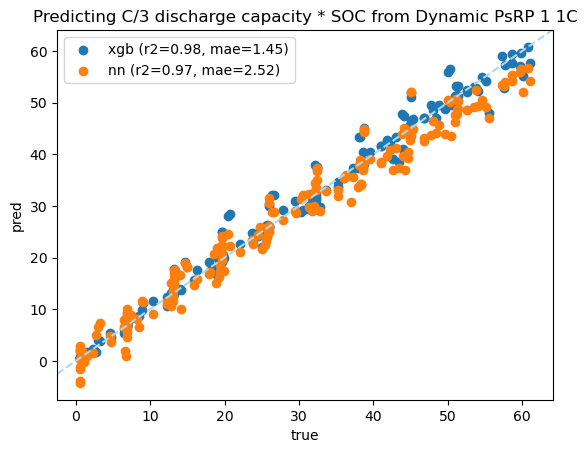

In [176]:
plot_true_vs_pred(A_temp, 'Dynamic PsRP 1 1C', 'C/3 discharge capacity * SOC')  # Charge depleting cycle charge throughput

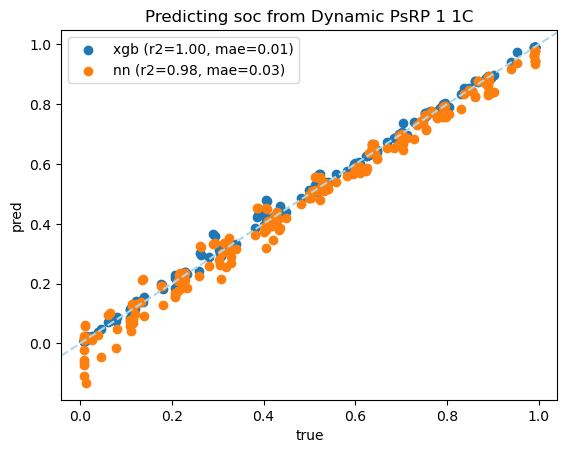

In [177]:
plot_true_vs_pred(A_temp, 'Dynamic PsRP 1 1C', 'soc')  # Charge depleting cycle charge throughput

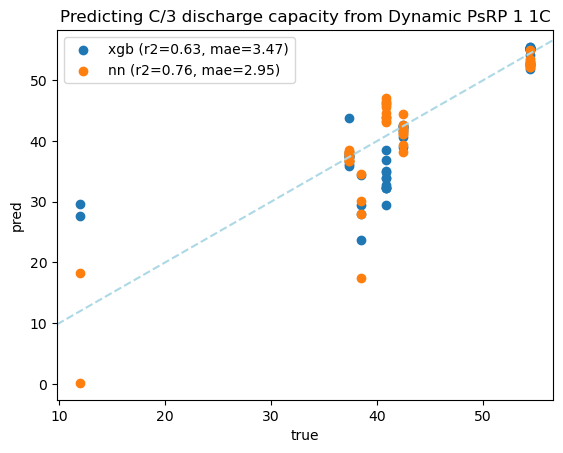

In [192]:
plot_true_vs_pred(B_temp, 'Dynamic PsRP 1 1C', 'C/3 discharge capacity')  # Charge depleting cycle charge throughput

## Plotting predicted (C/3 discharge capacity * SOC) / predicted SOC

dividing
r2:  -0.6613091666702957
mae:  3.153264
max error:  25.864975
directly
r2:  0.37494678441537765
mae:  2.3875942
max error:  8.414089


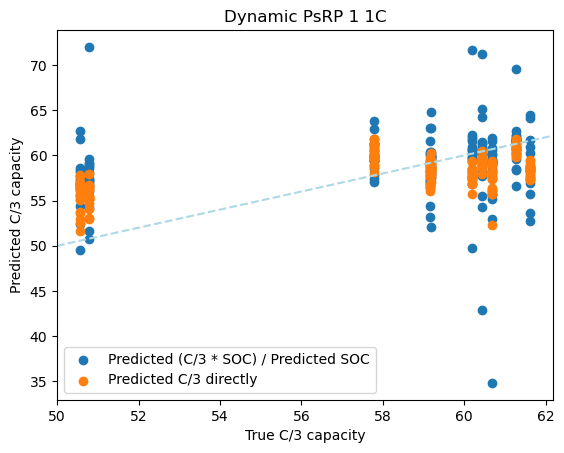

In [26]:
compare_capacity_preds(A_temp, 'Dynamic PsRP 1 1C')

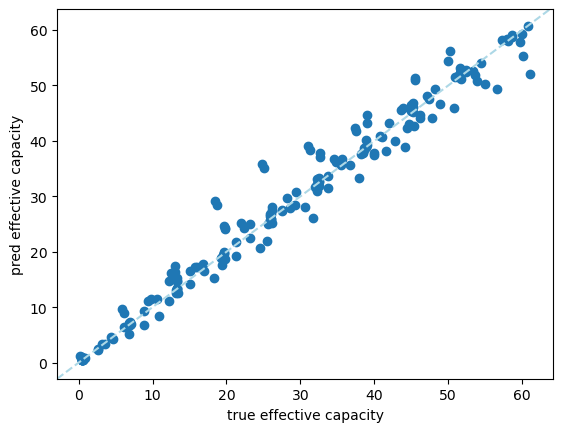

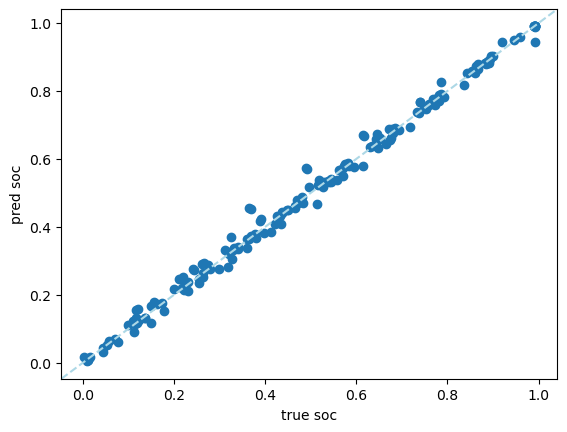

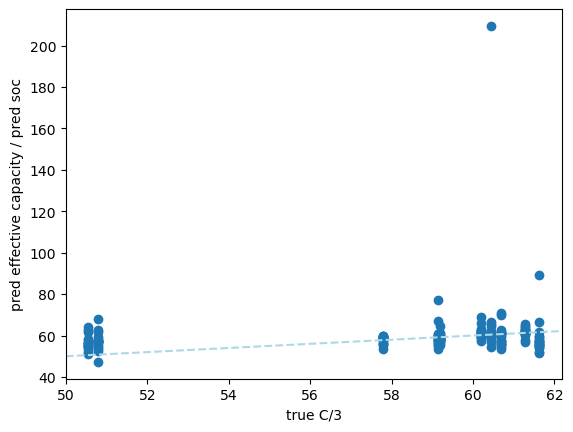

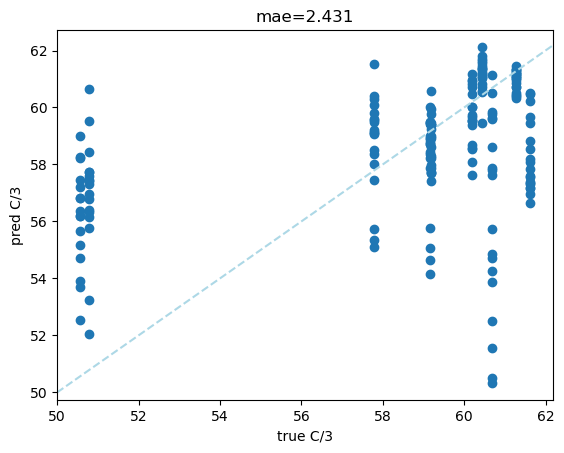

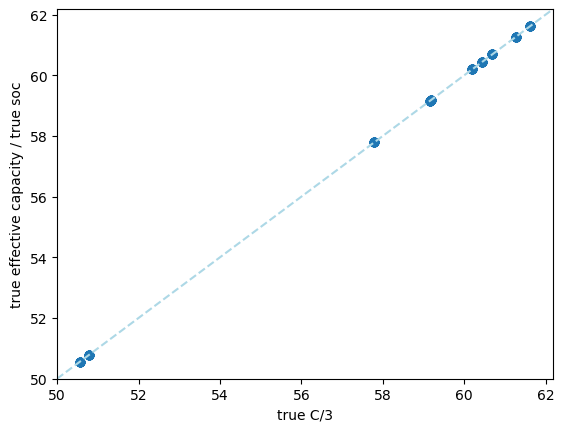

In [162]:
result_dict = A_no_temp

pred_effective_capacity = result_dict[feature]['C/3 discharge capacity * SOC']['pred_xgb'].flatten()
true_effective_capacity = result_dict[feature]['C/3 discharge capacity * SOC']['true'].flatten()
pred_soc = result_dict[feature]['soc']['pred_xgb'].flatten()
true_soc = result_dict[feature]['soc']['true'].flatten()
pred_capacity = result_dict[feature]['C/3 discharge capacity']['pred_xgb'].flatten()
true_capacity = result_dict[feature]['C/3 discharge capacity']['true'].flatten()


plt.figure()
plt.xlabel('true effective capacity')
plt.ylabel('pred effective capacity')
plt.scatter(true_effective_capacity, pred_effective_capacity)
plt.axline((true_effective_capacity.min(), true_effective_capacity.min()), slope=1, linestyle='--', color='lightblue')
plt.show()

plt.figure()
plt.xlabel('true soc')
plt.ylabel('pred soc')
plt.scatter(true_soc, pred_soc)
plt.axline((true_soc.min(), true_soc.min()), slope=1, linestyle='--', color='lightblue')
plt.show()


plt.figure()
plt.xlabel('true C/3')
plt.ylabel('pred effective capacity / pred soc')
plt.scatter(true_capacity, pred_effective_capacity / pred_soc)
plt.axline((true_capacity.min(), true_capacity.min()), slope=1, linestyle='--', color='lightblue')
plt.show()


plt.figure()
plt.xlabel('true C/3')
plt.ylabel('pred C/3')
mae = mean_absolute_error(true_capacity, pred_capacity)
plt.scatter(true_capacity, pred_capacity)
plt.title(f"mae={mae:.3f}")
plt.axline((true_capacity.min(), true_capacity.min()), slope=1, linestyle='--', color='lightblue')
plt.show()

plt.figure()
plt.xlabel('true C/3')
plt.ylabel('true effective capacity / true soc')
plt.scatter(true_capacity, true_effective_capacity / true_soc)
plt.axline((true_capacity.min(), true_capacity.min()), slope=1, linestyle='--', color='lightblue')
plt.show()